Prepare rules for the all the data sets 

1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values 

2) Change the minimum length in apriori algorithm 

3) Visulize the obtained rules using different plots

**Dataset : /content/book.csv**

In [1]:
#Install 'mlxtend' library
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#Import libraries
import mlxtend
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [3]:
#Import dataset
book = pd.read_csv('/content/book.csv')
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [4]:
book.shape

(2000, 11)

**Apriori Algorithm**

In [5]:
#Association rules with 10% Support and 70% confidence
frequent_itemsets_ap = apriori(book, min_support = 0.1,use_colnames = True)
print(frequent_itemsets_ap)

    support                       itemsets
0    0.4230                     (ChildBks)
1    0.2475                     (YouthBks)
2    0.4310                      (CookBks)
3    0.2820                     (DoItYBks)
4    0.2145                       (RefBks)
5    0.2410                       (ArtBks)
6    0.2760                      (GeogBks)
7    0.1135                     (ItalCook)
8    0.1085                     (Florence)
9    0.1650           (YouthBks, ChildBks)
10   0.2560            (CookBks, ChildBks)
11   0.1840           (ChildBks, DoItYBks)
12   0.1515             (ChildBks, RefBks)
13   0.1625             (ChildBks, ArtBks)
14   0.1950            (ChildBks, GeogBks)
15   0.1620            (CookBks, YouthBks)
16   0.1155           (YouthBks, DoItYBks)
17   0.1010             (YouthBks, ArtBks)
18   0.1205            (YouthBks, GeogBks)
19   0.1875            (CookBks, DoItYBks)
20   0.1525              (CookBks, RefBks)
21   0.1670              (CookBks, ArtBks)
22   0.1925

In [6]:
rules = association_rules(frequent_itemsets_ap,metric='lift',min_threshold=0.7)   # with 70% confidence
rules.sort_values('lift',ascending=False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
77,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
80,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
86,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
83,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
98,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
95,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
99,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
94,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657


In [7]:
rules[(rules.support > 0.015) & (rules.confidence > 0.4)].sort_values("confidence", ascending = False).shape

(70, 9)

In [8]:
rules['lhs items'] = rules['antecedents'].apply(lambda x:len(x) )
rules[rules['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
77,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,2
83,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,2
95,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,2
94,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,2
52,"(CookBks, ChildBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277,2


In [9]:
rules[rules.lift>1]    # Lift Ratio > 1 is a good influential rule in selecting the associated transactions

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,1
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,1
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,1
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,1
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,1
...,...,...,...,...,...,...,...,...,...,...
95,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,2
96,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,2
97,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237,1
98,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,1


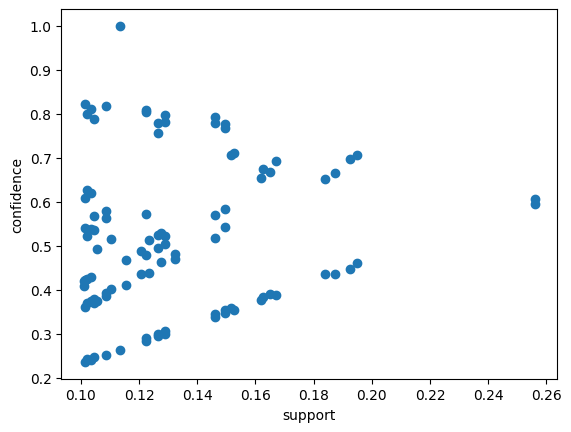

In [10]:
# visualization of obtained rule
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [11]:
#Association rules with 5% Support and 90% confidence
# with 5% support
frequent_itemsets2= apriori(book, min_support = 0.05,use_colnames = True)
print(frequent_itemsets2)

    support                                          itemsets
0    0.4230                                        (ChildBks)
1    0.2475                                        (YouthBks)
2    0.4310                                         (CookBks)
3    0.2820                                        (DoItYBks)
4    0.2145                                          (RefBks)
..      ...                                               ...
95   0.0600            (CookBks, YouthBks, GeogBks, DoItYBks)
96   0.0560              (CookBks, YouthBks, GeogBks, ArtBks)
97   0.0650              (CookBks, GeogBks, ArtBks, DoItYBks)
98   0.0510  (CookBks, YouthBks, ChildBks, GeogBks, DoItYBks)
99   0.0535    (CookBks, ChildBks, ArtBks, GeogBks, DoItYBks)

[100 rows x 2 columns]


In [12]:
# 90% confidence
rules2=association_rules(frequent_itemsets2,metric='lift',min_threshold=0.9)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
657,(CookBks),"(DoItYBks, ChildBks, GeogBks, ArtBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789
658,(ChildBks),"(CookBks, DoItYBks, GeogBks, ArtBks)",0.4230,0.0650,0.0535,0.126478,1.945808,0.026005,1.070379
659,(ArtBks),"(CookBks, ChildBks, GeogBks, DoItYBks)",0.2410,0.0890,0.0535,0.221992,2.494289,0.032051,1.170939
660,(GeogBks),"(CookBks, ChildBks, DoItYBks, ArtBks)",0.2760,0.0820,0.0535,0.193841,2.363910,0.030868,1.138733


In [13]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
rules2[rules2.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
657,(CookBks),"(DoItYBks, ChildBks, GeogBks, ArtBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789
658,(ChildBks),"(CookBks, DoItYBks, GeogBks, ArtBks)",0.4230,0.0650,0.0535,0.126478,1.945808,0.026005,1.070379
659,(ArtBks),"(CookBks, ChildBks, GeogBks, DoItYBks)",0.2410,0.0890,0.0535,0.221992,2.494289,0.032051,1.170939
660,(GeogBks),"(CookBks, ChildBks, DoItYBks, ArtBks)",0.2760,0.0820,0.0535,0.193841,2.363910,0.030868,1.138733


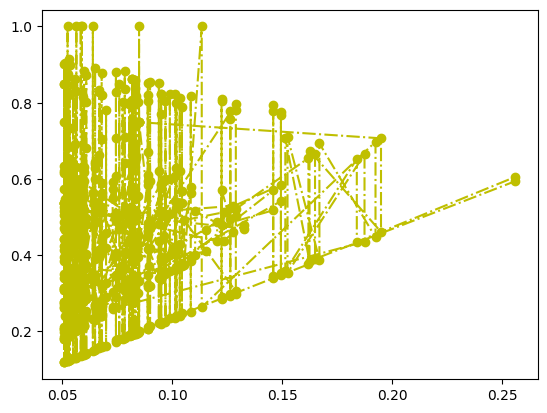

In [14]:
#Visualization of the obtained data
plt.plot(rules2['support'],rules2['confidence'],'o-.y')
plt.show()

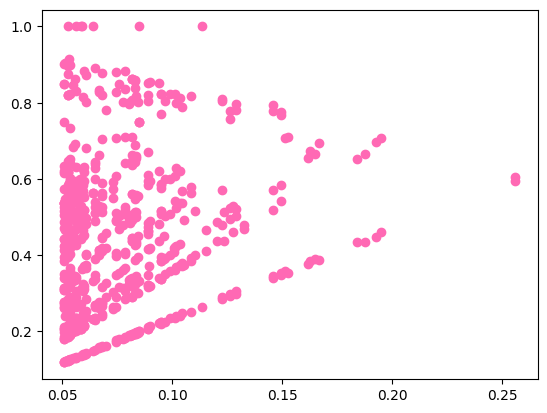

In [15]:
plt.scatter(rules2['support'],rules2['confidence'],color='hotpink')
plt.show()

**Dataset : /content/my_movies.csv**

In [16]:
#Load the dataset
movies = pd.read_csv('/content/my_movies.csv')
movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [17]:
movie1 = movies.iloc[:,5:15]
movie1.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


**Apriori Algorithm**

In [18]:
#Association rules with 10% Support and 70% confidence
frequent_itemsets = apriori(movie1, min_support = 0.1,use_colnames = True)
print(frequent_itemsets)

    support                                           itemsets
0       0.6                                      (Sixth Sense)
1       0.7                                        (Gladiator)
2       0.2                                            (LOTR1)
3       0.2                                    (Harry Potter1)
4       0.6                                          (Patriot)
5       0.2                                            (LOTR2)
6       0.1                                    (Harry Potter2)
7       0.1                                             (LOTR)
8       0.1                                       (Braveheart)
9       0.2                                       (Green Mile)
10      0.5                           (Gladiator, Sixth Sense)
11      0.1                               (LOTR1, Sixth Sense)
12      0.1                       (Harry Potter1, Sixth Sense)
13      0.4                             (Patriot, Sixth Sense)
14      0.1                               (LOTR2, Sixth

In [19]:
# 70% confidence
rules3=association_rules(frequent_itemsets,metric='lift',min_threshold=0.7)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
...,...,...,...,...,...,...,...,...,...
245,(Green Mile),"(LOTR2, LOTR1, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
246,(Sixth Sense),"(LOTR2, Harry Potter1, Green Mile, LOTR1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
247,(LOTR2),"(Harry Potter1, LOTR1, Green Mile, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
248,(LOTR1),"(LOTR2, Harry Potter1, Green Mile, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [20]:
rules3[rules3.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
6,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
245,(Green Mile),"(LOTR2, LOTR1, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
246,(Sixth Sense),"(LOTR2, Harry Potter1, Green Mile, LOTR1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
247,(LOTR2),"(Harry Potter1, LOTR1, Green Mile, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
248,(LOTR1),"(LOTR2, Harry Potter1, Green Mile, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


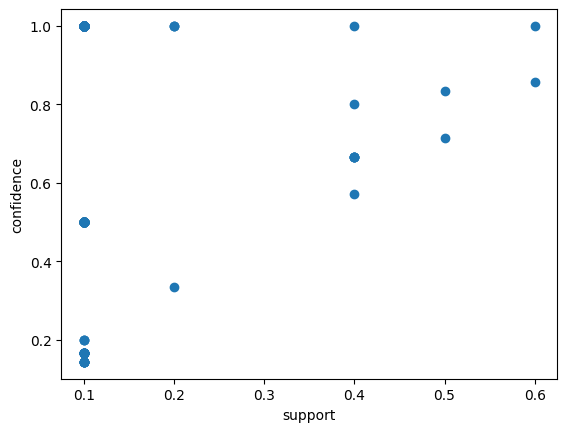

In [21]:
# visualization of obtained rule
plt.scatter(rules3['support'],rules3['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

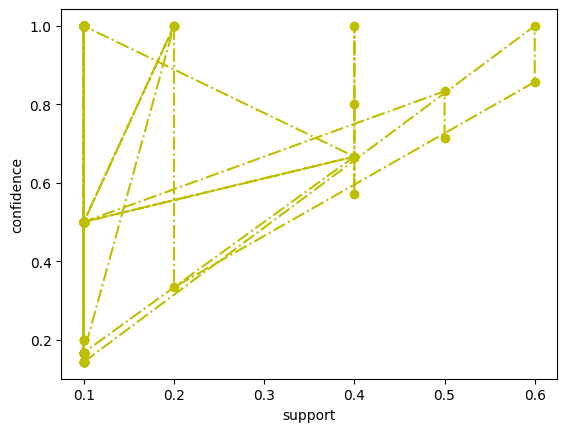

In [22]:
plt.plot(rules3['support'],rules3['confidence'],'o-.y')
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()